## Workshop notebooks

When working on your solution, you can save your notebook as many times as you like. You can also submit 
as many times as you like. In fact, it is a good idea to save and submit often.

**Only the last submission before the deadline** will be marked.
Note that you have to **submit** at least once for your work to be marked.

** Marks are out of 16 **

The notebook contains cells with code. Some of the code is (intentionally) missing. Please insert appropriate code where it says 'YOUR CODE HERE' and delete or comment out the 'raise NotImplementedError()' statements. Cells which do not contain any 'YOUR CODE HERE' lines will allow you to test your code; if they return an error there is something wrong with your implementation; if they do not return an error your code might be correct (it is unfortunately not possible to check for every possible error).

## Workshop V: Root finding and integration

In this notebook we implement and test methods for numerical integration, namely the **Newton-Cotes**, **trapezoidal** and **Simpson** integration methods. 



In [1]:
%matplotlib inline
import numpy as np
import math
import scipy
from scipy import special
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator


# Part 1: Root finding


We will implement three methods to find the zeroes of a given function. In all cases we would like to have the option to record intermediate estimates, for example to determine the rate of convergence, or to debug when no roots are found. To do so, we will use a flag `returnPoints` to specify whether or not we want the list of root trails, and the associated function evaluations, to be returned. For example, if we found the final value of x and have the values of x stored in `xs` and the associated values $f(x_i)$ stored in `vs` we can use this code snippet to return the value:

```
if returnPoints:
    return x,(xs,vs)
else:
    return x
```

The initial value(s) provided to the method should be included in `xs` and the corresponding value of the function in `vs`. 

### Implement the Newton-Raphson method

In [10]:
class NotConverging(Exception):
    ''' This is an exception to be raised when there is no convergence.'''
    pass


def NewtonRaphson(f,df,x0,tolerance,returnPoints=False):
    '''
       Finds a root of the equation f(x)=0.
       Input:
       f: the function f(x) (must be a one-parameter python function)
       df: the derivative of f (must be a one-parameter python function)
       x0: the starting value for the root finding (float)
       torerance: the integration tolerance (float)
       returnPoints: (bool) if True, return the result and the steps, 
       if False, return only the result. 
       
       The function should stops iterating when 
       
            | x_{i+1} - x_{i} | < tolerance
            
        and return x_{i+1}.
        
        To detect cases where there is a convergence problem we raise a 
        NotConverging exception if after 1000 iterations we have not 
        satisfied the above condition
        
    '''
    # YOUR CODE HERE
    x = x0
    ans = []
    xs = []
    steps = []
    step = 0
    for i in range(1000):
        if returnPoints:
            xs.append(x)
            steps.append(step)
            step += 1
        x = x0 - f(x0) / df(x0)
        if (abs(x - x0) < tolerance):
            if returnPoints:
                steps.append(step)
                xs.append(x)
                ans.append(x)
                ans.append([xs, steps])
                return ans
            else:
                return x
        x0 = x
    raise NotConverging()

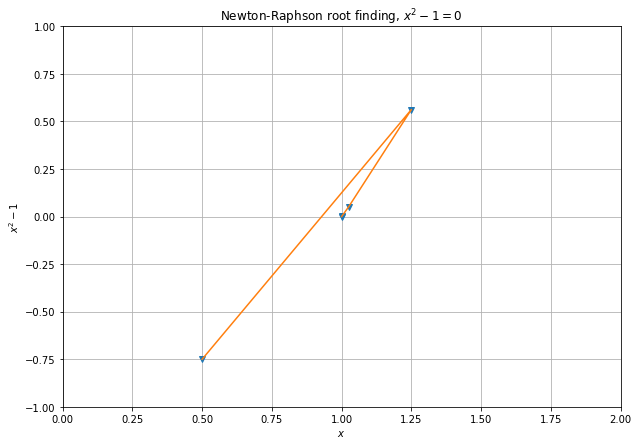

In [11]:
# Example test case: find root for the function f(x)=x^2-1
def f(x): return np.array(x)**2-1.0
def df(x): return 2.0*x

# initial guess, take x= 0.5
# required accuracy is acc = 1e-3
x_guess = 0.5
acc     = 1e-3
ans     = NewtonRaphson(f,df,x_guess,acc,returnPoints=True)

# plot result, including intermediate points
fig, ax = plt.subplots(1,1, figsize=(10, 7))

ax.plot(ans[1][0],f(ans[1][0]),'v')
ax.plot(ans[1][0],f(ans[1][0]))
ax.set_xlim([0,2.])
ax.set_ylim([-1, 1.])
ax.set_ylabel(r"$x^2-1$")
ax.set_xlabel(r"$x$")
ax.title.set_text(r"Newton-Raphson root finding, $x^2-1=0$")
ax.grid(True)


The cell below tests your implementation of the Newton-Raphson scheme.

** 2 marks **

In [12]:
# this tests the implementation of Newton-Raphson on another function
def f(x): return np.log(x)-np.pi 
def df(x): return 1.0/(x)

assert np.isclose(NewtonRaphson(f,df,0.1,1e-10),np.exp(np.pi))
x,(xs,vs)=NewtonRaphson(f,df,0.05,1e-3,returnPoints=True)
assert len(xs)==9 and len(vs)==9

### Implement the secant method

In [13]:
def secant(f,x0,x1,tolerance,returnPoints=False):
    '''
    finds a root of the equation f(x)=0, 
    Input:
       f: the function f(x) (must be a one-parameter python function)
       x0, x1: the starting values for the root finding (float)
       torerance: the integration tolerance (float)
       returnPoints: (bool) if True, return the result and the steps, 
       if False, return only the result. 
       
    x0 and x1 are the first two guesses (x0 != x1). Starting from these, the
    method determines subsequent improved guesses, x2, x3, ...
    
    The termination condition is
    
    | (x_{i+1}-x{i})/(x_{i+1}+x_{i}) | < tolerance,
    
    where the x_{i+1} and x_{i} are the two last guesses.
    If the method fails to converge after 1000 steps, we bail out
    with a NotConverging exception
    
    '''
    # YOUR CODE HERE
    ans = []
    xs = []
    xs.append(x0)
    steps = []
    steps.append(0)
    step = 1
    for i in range(1000):
        if returnPoints:
            xs.append(x1)
            steps.append(step)
            step += 1
        x = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        if (abs((x - x1) / (x + x1)) < tolerance):
            if returnPoints:
                steps.append(step)
                xs.append(x)
                ans.append(x)
                ans.append([xs, steps])
                return ans
            else:
                return x
        x0 = x1
        x1 = x
    raise NotConverging()

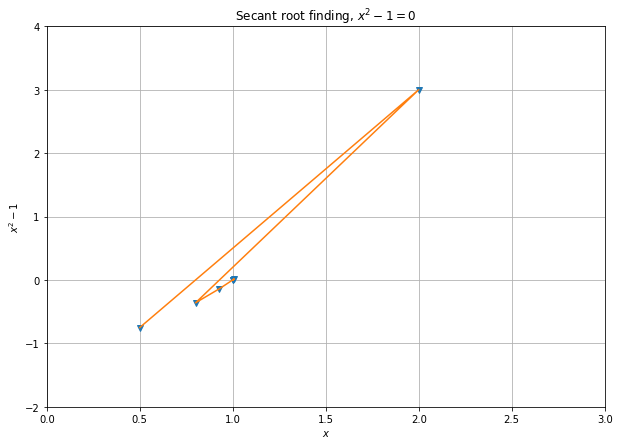

In [14]:
# Example test case: find root for f(x)=x^2-1
def f(x): return np.array(x)**2-1.0
def df(x): return 2.0*x

# initial guesses x0=0.5 and x1=2.0
# required accuracy is acc = 1e-3
x0, x1, acc = 0.5, 2.0, 1e-3
ans = secant(f, x0, x1, acc, returnPoints=True)

# plot approach to converged root 
fig, ax = plt.subplots(1,1, figsize=(10, 7))

ax.plot(ans[1][0],f(ans[1][0]),'v')
ax.plot(ans[1][0],f(ans[1][0]))
ax.set_xlim([0,3.])
ax.set_ylim([-2, 4.])
ax.set_ylabel(r"$x^2-1$")
ax.set_xlabel(r"$x$")
ax.title.set_text(r"Secant root finding, $x^2-1=0$")
ax.grid(True)

The cell below tests your implementation of the secant method.

** 2 marks **

In [15]:
# this tests the implementation of secant root finder on another function
def f(x): return np.exp(x)-np.pi 
def df(x): return np.exp(x)

assert np.isclose(secant(f,0,2,1e-10),np.log(np.pi))
x,(xs,vs)=secant(f,0,2,1e-3,returnPoints=True)
assert len(xs)==8 and len(vs)==8

### Implement the bisection method

In [16]:
def bisect(f, x0, x1, tolerance, returnPoints=False):
    '''
    finds a root of the equation f(x)=0. 
    
    Input:
       f: the function f(x) (must be a one-parameter python function)
       x0, x1: the first two guesses (float)
       torerance: the integration tolerance (float)
       returnPoints: (bool) if True, return the result and the steps, 
       if False, return only the result. 
       
    x0 and x1 are the first two guesses.
    They need to **straddle** a root, meaning f(x0)*f(x1)<0.
 
    It should not matter which one corresponds to a positive 
    value of f. 
    
    The iteration terminates when the length of the interval
    between the two last estimates is smaller than the tolerance,
    
    | x_{i+1} - x_{i} | < tolerance
    
    When this condition is satisfied, the function should return
    
    x_{i+2} = (x_{i+1}-x{i}) / 2
     
     
   The list of returned points should not include x0 or x1.

    '''
    # YOUR CODE HERE
    ans = []
    xs = []
    steps = []
    step = 0
    x_new = x1
    for i in range(1000):
        if returnPoints:
            xs.append(x_new)
            steps.append(step)
            step += 1
        x = 1/2 * (x0 + x1)
        if f(x) * f(x0) < 0:
            x1 = x
            x_new = x
        else:
            x0 = x
            x_new = x
        if (abs(x1 - x0) < tolerance):
            if returnPoints:
                steps.append(step)
                xs.append(x_new)
                ans.append(x)
                ans.append([xs, steps])
                return ans
            else:
                return x
    raise NotConverging()

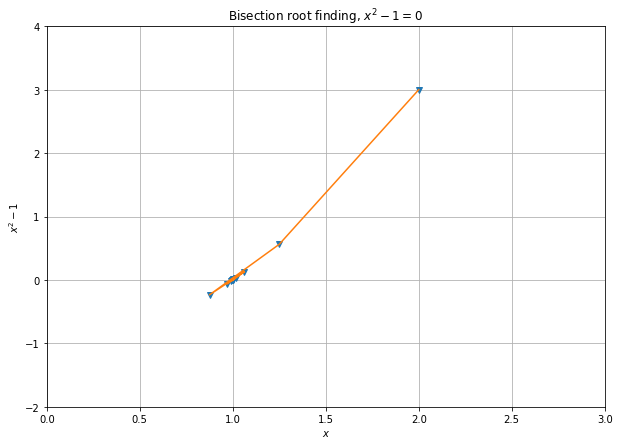

In [17]:
# Example test case: find root for x^2-1=0
def f(x): return np.array(x)**2-1.0
def df(x): return 2.0*x

# initial guess x0=0.5, x1=2
# accuracy is acc = 1e-3
x0, x1, acc = 0.5, 2.0, 1e-3
ans = bisect(f, x0, x1, acc, returnPoints=True)

# plot approach to converged root
fig, ax = plt.subplots(1,1, figsize=(10, 7))

ax.plot(ans[1][0],f(ans[1][0]),'v')
ax.plot(ans[1][0],f(ans[1][0]))
ax.set_xlim([0,3.])
ax.set_ylim([-2, 4.])
ax.set_ylabel(r"$x^2-1$")
ax.set_xlabel(r"$x$")
ax.title.set_text(r"Bisection root finding, $x^2-1=0$")
ax.grid(True)

The cell below tests your implementation of the bisection method.

** 2 marks **

In [18]:
# this tests the implementation of bisection root finding on another function
def f(x): return np.cos(x)-np.sin(x) 
def df(x): return -np.sin(x)-np.cos(x)

assert np.isclose(bisect(f,0,2,1e-10),np.pi/4)
x,(xs,vs)=bisect(f,0,2,1e-3,returnPoints=True)
assert len(xs)==12 and len(vs)==12

### Computing the roots of a function

The hidden cell below defines a function f(x), and plots it over a given range in x.
Compute the first three roots of f(x) to 6 significant figures.

Enter your answers in the boxes below, in increasing order. The boxes will appear when you run the hidden cells below.


In [2]:
def mybisect(f, x0, x1, tolerance, returnPoints=False):
    '''
    finds a root of the equation f(x)=0. 
    x0 and x1 are the first two guesses.
    They need to **straddle** a root, meaning f(x0)*f(x1)<0.
 
    It should not matter which one corresponds to a positive 
    value of f. 
    
    The iteration terminates when the length of the interval
    between the two last estimates is smaller than the tolerance,
    
    | x_{i+1} - x_{i} | < tolerance
    
    When this condition is satisfied, the function should return
    
    x_{i+2} = (x_{i+1}-x{i}) / 2
     
     
   The list of returned points should not include x0 or x1.

    '''
    nIter=0
    f0=f(x0)
    f1=f(x1)
    if f0*f1>0:
        print(f0,f1)
        raise NotConverging
    if f0>0:
        xpos=x0
        xneg=x1
    else:
        xpos=x1
        xneg=x0        
    xs=[]
    vs=[]
    while nIter<10000:
        xnew=(xpos+xneg)/2
        fnew=f(xnew)
        # print(xpos,xneg,xnew)
        # print(f(xpos),f(xneg),f(xnew))
        xs.append(xnew)
        vs.append(fnew)
        if abs(xpos-xneg)<tolerance:
            if returnPoints:
                return xnew,(xs,vs)
            else:
                return xnew
        if fnew>0:
            xpos=xnew
        else:
            xneg=xnew
            


[2.4048255383968353, 5.520078107714653, 8.653727933764458]


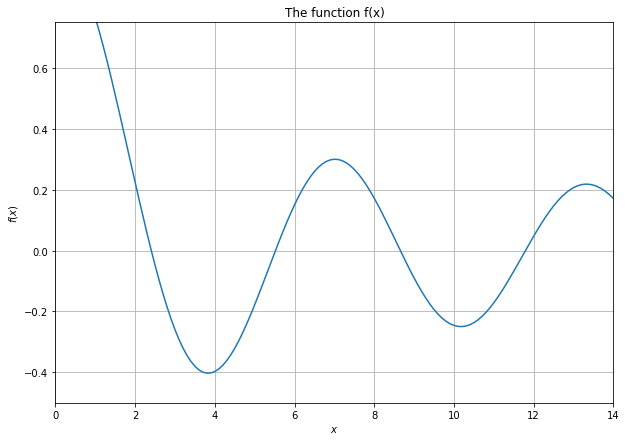

In [3]:
def f(x):
    return special.jv(0,x)

x = np.arange(0,100,0.1)    
fig, ax = plt.subplots(1,1, figsize=(10, 7))

ax.plot(x,f(x))

ax.set_xlim([0, 14])
ax.set_ylim([-0.5, 0.75])
ax.set_ylabel(r"$f(x)$")
ax.set_xlabel(r"$x$")
ax.title.set_text(r"The function f(x)")
ax.grid(True)
    

# Our solution uses bi-section
xlow    = [1., 3., 6.]
xhigh   = [3., 6., 9.]
myroots = []
for x0,x1 in zip(xlow, xhigh):
    myroots.append(mybisect(f, x0, x1, 1e-7))

# print bisection answer, and compare to known zeros of bessel function    
print(myroots)
# roots are [2.4048255383968353, 5.520078107714653, 8.653727933764458]
# print(special.jn_zeros(0,3)-myroots)



Compute the roots of function `f(x)` above. You may want to create some more cells to do so.


In [4]:
import mywidgets
root1=mywidgets.myFloatBox('root','q1','Root 1 = ','First root. (Specify the answer to 7 significant digits)')
root1.getWidget()



In [5]:
root2=mywidgets.myFloatBox('root','q2','Root 2 = ','Second root. (Specify the answer to 7 significant digits)')
root2.getWidget()

In [6]:
root3=mywidgets.myFloatBox('root','q3','Root 3 = ','Third root. (Specify the answer to 7 significant digits)')
root3.getWidget()


## Rate of convergence of root finders

We are now going to look at the three methods and see how they compare, by finding zeroes of the function  f(x)=x−tanh(2x). The first few cells below illustrate the method. Run them to see what happens. Next you will be asked to examine the convergence for a different function.

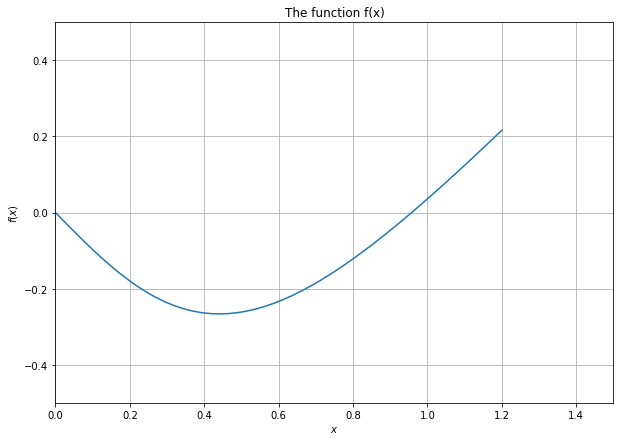

In [24]:
# define the function and compute its derivative
def f(x): return x-np.tanh(2*x)
def df(x): return 1.0-2.0/np.cosh(2*x)**2

# plot the function
fig, ax = plt.subplots(1,1, figsize=(10, 7))
xmin,xmax =0, 1.2
xs=np.linspace(xmin,xmax,50)
ax.plot(xs,f(xs))

#ax.plot.hlines(0,xmin,xmax)
ax.set_xlim([0,1.5])
ax.set_ylim([-0.5, 0.5])
ax.set_ylabel(r"$f(x)$")
ax.set_xlabel(r"$x$")
ax.title.set_text(r"The function f(x)")
ax.grid(True)




In the following cell, we use all three methods to compute the root. We also plot the relative error versus the iteration count, to examine the rate of convergence


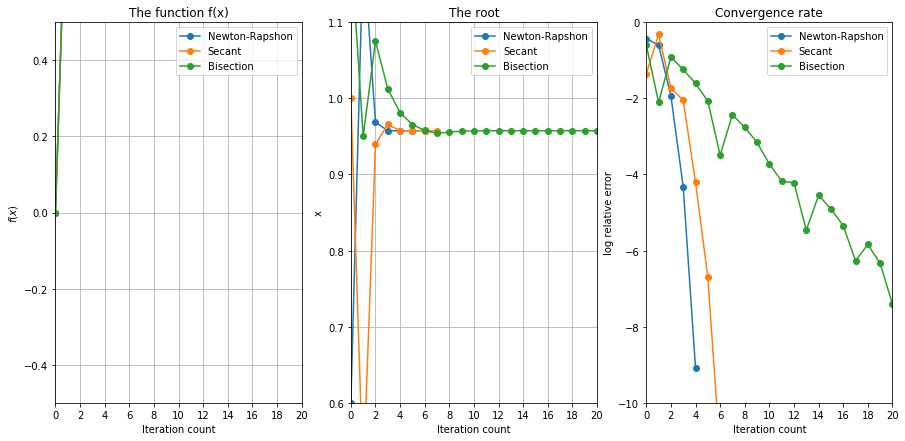

In [25]:
fig, ax = plt.subplots(1,3, figsize=(15, 7))

methods = ['Newton-Rapshon', 'Secant', 'Bisection']
# methods = ['Bisection']

ax[0].set_xlim([0, 20])
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[0].set_ylim([-0.5, 0.5])
ax[0].set_ylabel(r"$f(x)$")
ax[0].set_xlabel(r"Iteration count")
ax[0].title.set_text(r"The function f(x)")
ax[0].grid(True)

ax[1].set_xlim([0, 20])
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[1].set_ylim([0.6, 1.1])
ax[1].set_ylabel(r"x")
ax[1].set_xlabel(r"Iteration count")
ax[1].title.set_text(r"The root")
ax[1].grid(True)

ax[2].set_xlim([0, 20])
ax[2].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[2].set_ylim([-10, 0.])
ax[2].set_ylabel(r"log relative error")
ax[2].set_xlabel(r"Iteration count")
ax[2].title.set_text(r"Convergence rate")


for method in methods:
    if(method == methods[0]):
        x,(xs,vs)=NewtonRaphson(f,df,0.6,1e-10,returnPoints=True)
    if(method == methods[1]):
        x,(xs,vs)=secant(f,1.0,0.5,1e-10,returnPoints=True)
    if(method == methods[2]):
        x,(xs,vs)=bisect(f,0.7,1.2,1e-10,returnPoints=True)

    # plot function value for successive roots
    xs    = np.array(xs)
    vs    = np.array(vs)
    count = np.arange(0, len(xs), 1) 
    
    # function value
    ax[0].plot(count, vs, marker = 'o', ls = '-', label=method)
    
    # root
    ax[1].plot(count, xs, marker = 'o', ls = '-', label=method)
    
    # relative accuracy
    target=xs[-1]
    reldiff=abs((xs-target)/target)
    mask = np.where(reldiff > 0)[0].astype(np.int32)
    ax[2].plot(count[mask], np.log10(reldiff[mask]), marker = 'o', ls = '-', label=method)
 
ax[0].legend()
ax[1].legend()
ax[2].legend()


The function $f(x)=x^5-3x^2+3$ has a root near $x=0.8$. Use the Newton-Raphson scheme to find the root.
Start from the guess $x=-0.1$. After how many iterations is the tolerance better than $10^{-6}$?
Create some more cells below to answer this question.

**1 mark **



In [26]:
def f(x): return x ** 5 - 3 * x ** 2 + 3
def df(x): return 5 * x ** 4 - 6 * x
x,(xs,vs)=NewtonRaphson(f,df,-0.1,1e-6,returnPoints=True)
print(len(vs))


13


13 iterations are used to make the tolerance better than 1e-6

In [27]:
from IPython.display import display, HTML
display(HTML('<hr>'))

Examine root finding for the function $f(x)=x^3+3x^2+x+1$.
Insert some more cells to answer the following questions.

**2 marks**

In [28]:
def f(x): return x ** 3 - 3 * x ** 2 + x + 1
def df(x): return 3 * x ** 2 + 6 * x + 1
x,(xs,vs) = bisect(f,-3,-2,1e-6,returnPoints=True)
print(len(vs))

21


In [7]:
import mywidgets
mcb=mywidgets.myCheckBoxSet('root','q5',"Next we consider the function $f(x)=x^3+3x^2+x+1$, which of the following statements are true?",[
    "The Newton-Raphson method converges for $x_0=0$ in less than 10 iterations",
    "The Newton-Raphson method converges quicker for $x_0=-3$ than for $x_0=-2$",
    "For a tolerance of $10^{-6}$ the secant method is quicker than the bisection method with $x_0=-3$ and $x_1=-2$"
])
mcb.getWidget()

In [30]:
from IPython.display import display, HTML
display(HTML('<hr>'))

# Part 2: Numerical integration

## Integration
Please implement the Newton-Cotes, Trapezoidal and Simpson rule integration methods in the following cells. Each integrator should take the following arguments:

- `f`: the function to be integrated
- `xmin` and `xmax`: the lower and upper limits of integration
- `N`: the number of subdivisions of the interval, for `N` subdivisions we will evaluate the function `f` at `N+1` locations (including at `xmin` and `xmax`)  

Hint: You might want to look at the function `linspace` in the numpy module... 

### Newton-Cotes

Implement the Newton-Cotes integration method in the next cell

In [31]:
def NCintegrate(f,xmin,xmax,N):
    ''' This function performs a Newton-Cotes integration of function'''
    # YOUR CODE HERE
    delta_x = (xmax - xmin) / N
    square = 0
    for i in range(N):
        square += f(xmin + i * delta_x) * delta_x
    return square

The next cell tests your Newton-Cotes implementaton, by calculating the following numerical integrals, using **500** segments.

 - $\int_0^1 x^{1/2}\,{\rm d}x$

 - $\int_0^1 exp(-x^2)\,{\rm dx}$

**1 mark**


In [32]:
# test of the NC method
def test_sqrt(x): return np.sqrt(x)
def test_gauss(x): return np.exp(-x**2)

#
# print(NCintegrate(test_gauss,0,1,500))
# print(np.sqrt(np.pi)*special.erf(1.)/2)
# print(NCintegrate(test_sqrt,0,1,500))
# print(2./3.)
#

assert np.isclose(NCintegrate(test_sqrt,0,1,500),0.665648239)
assert np.isclose(NCintegrate(test_gauss,0,1,500),0.7474560081182616)

### Trapezoidal rule

Implement the trapezoidal rule integration method in the next cell

In [33]:
def Trapezoidal(f,xmin,xmax,N):
    delta_x = (xmax - xmin) / N
    square = 0
    for i in range(N):
        square += f(xmin + i * delta_x) * delta_x
    square += (f(xmax) - f(xmin)) * delta_x / 2
    return square

The next cell tests trapezoidal rule implementaton, by calculating the following numerical integrals, using **N=500** segments

  - $\int_0^{10} \sin(x)^{2}\,{\rm d}x$

  - $\int_0^1 exp(-x^2)\,{\rm dx}$

**1 mark**

In [34]:
# test of the Trapezoidal method
def test(x): return np.sin(x**2)

# 
# print(Trapezoidal(test_sqrt,0,1,500))
# print(Trapezoidal(test_gauss,0,1,500))
#

assert np.isclose(Trapezoidal(test_sqrt,0,1,500),0.6666482394240997)
assert np.isclose(Trapezoidal(test_gauss,0,1,500),0.7468238875594331)

### Simpson's rule

Implement Simpson's rule integration method in the next cell

In [35]:
def Simpson(f,xmin,xmax,N):
    # YOUR CODE HERE
    delta_x = (xmax - xmin) / N
    square = 0
    for i in range(0, N - 1, 2):
        square += delta_x / 3 * (f(xmin + i * delta_x) + 4 * f(xmin + (i + 1) * delta_x) + f(xmin + (i + 2) * delta_x))
    return square

The next cell tests your Simpson's rule implementation, using **N=500** segments.
**N needs to be even**

  - $\int_2^{5} 1/x\,{\rm d}x$

  - $\int_0^1 exp(-x^2)\,{\rm dx}$

**1 mark**

In [36]:
def test_oneover(x): return 1.0/x

#
# print(Simpson(test_oneover,2,5,500))
# print(np.log(5/2))
# print(Simpson(test_gauss,0,1,500))
#
assert np.isclose(Simpson(test_oneover,2,5,500),0.9162907318767844)
assert np.isclose(Simpson(test_gauss,0,1,500),0.7468241328125584)

### Test of integration

Integate the function $f$, defined below, over the interval $[0,10]$. Enter your answer in the box below.
It should be accurate to 7 significant digits.

0.2835267455586614


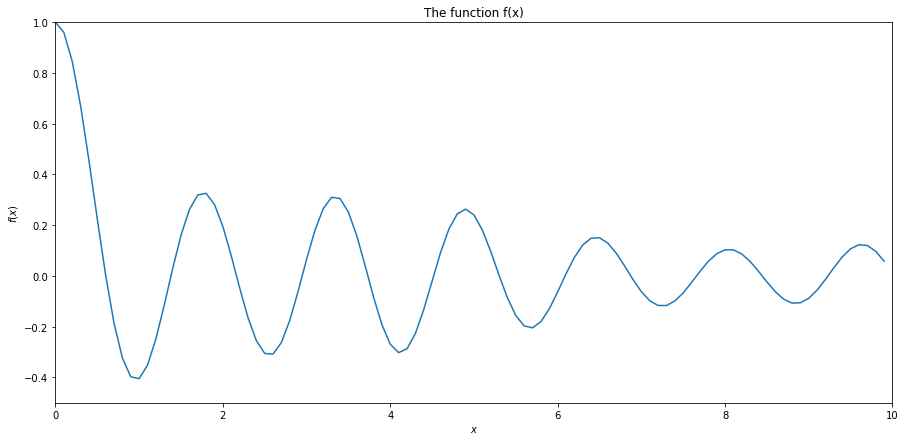

In [37]:
# Function to be integrated
def f(x):
    return np.exp(special.jv(3,x)) * special.jv(0,4*x)
a   = 0
b   = 10

fig, ax = plt.subplots(1,1, figsize=(15, 7))

ax.set_xlim([0, 10])
ax.set_ylim([-0.5, 1.0])
ax.set_ylabel(r"$f(x)$")
ax.set_xlabel(r"$x$")
ax.title.set_text(r"The function f(x)")

x   = np.arange(a,b,b/100)
ax.plot(x, f(x))
print(Simpson(f,a,b,1000000))

In [8]:
import mywidgets
mfb=mywidgets.myFloatBox('integration','q1','Integral','Result of numerical integration. Specify the answer to 7 significant digits')
mfb.getWidget()

In [39]:
# HIDDEN TESTS
#a   = 0
#b   = 10
#x   = np.arange(a,b,b/100)
#plt.plot(x, f(x))
#ans = []
#Ns  = [3,4,5,6,7,8,9]
#ans = np.zeros(np.amax(Ns))
#answer = 0.2835267523610387
#for n in Ns:
#    m        = 2**n
#    ans[n-1] = Simpson(f, a, b, m)
#err = ans - answer
# print(ans[-1])
# print((ans[-1]-answer)/answer)
# print(err)


answer   = 0.2835267523610387                   # correct answer
reply    = mfb.widgets[0].value                 # student's answer
accuracy = np.abs(reply-answer)/answer * 1e7    # relative error
# print(reply, answer, accuracy)
assert np.isclose(accuracy,0,atol=1)






## Play area: Convergence rates

We compare the convergence rates of the integrators.

This part has no assignment, it is only a place to play. In the following cells we implement higher order integration routines. We use these to compute the numerical integral of some functions, varying the number of segments. This allows you to contrast the rate of convergence of the schemes.

Run the cells below. Can you provide a rule of thumb to the question: ** does the functional shape determine which integrator gives the most accurate answer for a given number of function evaluations**?



In [40]:
# Define third, fourth and fifth-order integrators
from itertools import cycle

def i3(f,xmin,xmax,Nin):
    N=Nin-(Nin%4)
    xs=np.linspace(xmin,xmax,N+1)
    dx=(xmax-xmin)/float(N)
    fs=f(xs)
    c=cycle([14,32,12,32])
    l=list(next(c) for i in range(N))
    l.append(7)
    l[0]=7
    coeffs=np.array(l)
    return dx*sum(fs*coeffs)*2.0/45.0

def i4(f,xmin,xmax,Nin):
    N=Nin-(Nin%5)
    xs=np.linspace(xmin,xmax,N+1)
    dx=(xmax-xmin)/float(N)
    fs=f(xs)
    c=cycle([38,75,50,50,75])
    l=list(next(c) for i in range(N))
    l.append(19)
    l[0]=19
    coeffs=np.array(l)
    return dx*sum(fs*coeffs)*5.0/288.0
def i5(f,xmin,xmax,Nin):
    N=Nin-(Nin%6)
    xs=np.linspace(xmin,xmax,N+1)
    dx=(xmax-xmin)/float(N)
    fs=f(xs)
    c=cycle([82,216,27,272,27,216])
    l=list(next(c) for i in range(N))
    l.append(41)
    l[0]=41
    coeffs=np.array(l)
    return dx*sum(fs*coeffs)*1.0/140.0

In [41]:
# for each method, run the integrator for a range of step sizes, and compute the error
# make a plot contasting the convergence with increasing number of steps, N
methods=[
    (NCintegrate,'NC'),
    (Trapezoidal,'Trap'),
    (Simpson,'Simpson'),
    (i3,'cubic'),
    (i4,'quartic'),
    (i5,'5th order')
]

def makeErrorPlot(f,xmin,xmax,trueValue):
    '''This function plots the error as a function of the number of subdivisions for the 
       integration methods defined above.'''    
    def error(IntFn,N):
        est=IntFn(f,xmin,xmax,N)
        return abs(est-trueValue)

    Ns=[4**n for n in range(3,12)]
    for (fn,label) in methods:    
        errors=[error(fn,N) for N in Ns]
        plt.plot(Ns,errors,label=label)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'$N$')
    plt.ylabel('error')
    plt.legend()

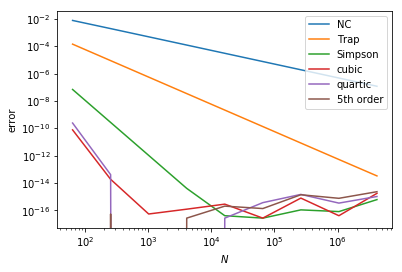

In [42]:
# f(x) = x^7: higher-order methods converge much faster
def xto7(x):
    return x**7

makeErrorPlot(xto7,0.0,1.0,0.125)

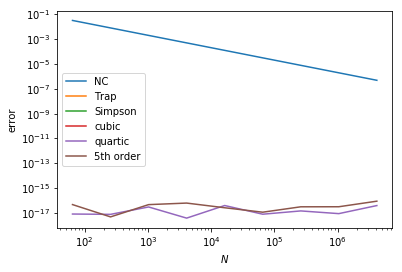

In [43]:
# f(x)=2-4x: not surprisingly, higher order schemes all converge at the same rate for this linear function
def linear(x):
    return 2.0-4.0*x 
makeErrorPlot(linear,0.0,1.0,0)

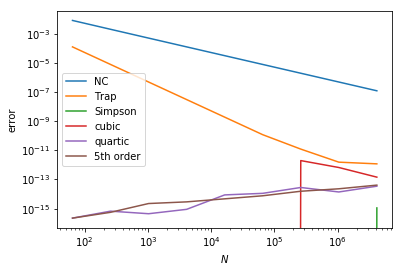

In [44]:
# f(x) = 2-4x+3x^2: again, once method is of high enough order, all converge at the same rate. Note the onset of round-off errors set
def quadratic(x):
    return 2.0-4.0*x+3.0*x**2 
makeErrorPlot(quadratic,0.0,1.0,1.0)

In [ ]:
def discontinous(x):
    return x*np.sin(x)/abs(np.sin(x))

xs=np.linspace(1,1+10*np.pi,2000)
plt.plot(xs,discontinous(xs))

In [ ]:
# If the function is discontinuous, going to high-orders does not improve convergence
makeErrorPlot(discontinous,1,1+10*np.pi,5*(2*np.pi-np.pi**2))

In [ ]:
def complicated(x):
    return np.sqrt(x+np.cos(5*x)**2)/(1+(x-0.3)**2)

makeErrorPlot(complicated,0.0,1.0,0.85683203415819954517417626994)

In [ ]:
def exponential(x):
    return np.exp(x)

makeErrorPlot(exponential,0.0,1.0,np.exp(1)-1)

In [ ]:
def exponential2(x):
    return np.exp(1.0/x)/(x**2)

makeErrorPlot(exponential2,1.0,4.0,-np.exp(1.0/4.0)+np.exp(1.0))

In [ ]:
def sqrt1(x):
    return np.sqrt(1.0-x**2)

makeErrorPlot(sqrt1,0.0,1.0,np.pi/4.0)